# Labolatorium 7

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

### Wczytanie i preprocessing danych MNIST

In [23]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28, 1), y_train shape: (60000,)
x_test shape: (10000, 28, 28, 1), y_test shape: (10000,)


### Zdefiniowanie Modelu Kodera

In [24]:
input_img = Input(shape=(28, 28, 1))
x = Flatten()(input_img)
x = Dense(200, activation='relu')(x)
x = Dense(200, activation='relu')(x)
latent_space = Dense(2, activation='tanh')(x)
encoder = Model(input_img, latent_space)
encoder.summary()

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 2)              │           402 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 197,602 (771.88 KB)

 Trainable params: 197,602 (771.88 KB)

 Non-trainable params: 0 (0.00 B)

### Zdefiniowanie modelu dekodera

In [25]:
latent_inputs = Input(shape=(2,))
x = Dense(200, activation='relu')(latent_inputs)
x = Dense(200, activation='relu')(x)
x = Dense(28 * 28, activation='relu')(x)
decoded_img = Reshape((28, 28, 1))(x)
decoder = Model(latent_inputs, decoded_img)
decoder.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 200)            │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 784)            │       157,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 198,384 (774.94 KB)

 Trainable params: 198,384 (774.94 KB)

 Non-trainable params: 0 (0.00 B)

### Autoencoder i trenowanie

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0803 - val_loss: 0.0591
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0565 - val_loss: 0.0520
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0511 - val_loss: 0.0489
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0485 - val_loss: 0.0470
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0468 - val_loss: 0.0459
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0457 - val_loss: 0.0450
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0447 - val_loss: 0.0440
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0436 - val_loss: 0.0432
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0428 - val_loss: 0.0423
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0420 - val_loss: 0.0417
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0416 - val_loss: 0.0416
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

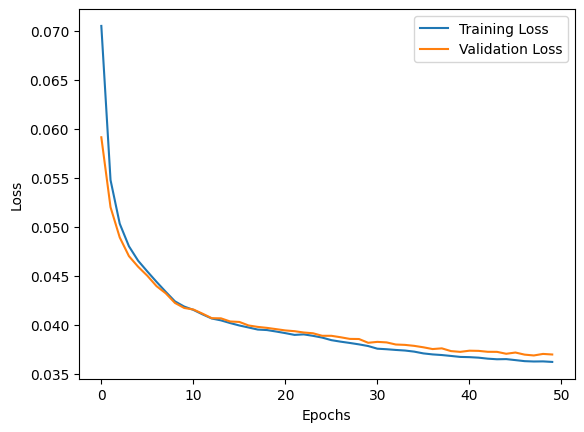

In [26]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(optimizer=Adam(), loss='mse')

history = autoencoder.fit(
    x_train, x_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Wizualizacja obrazów

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


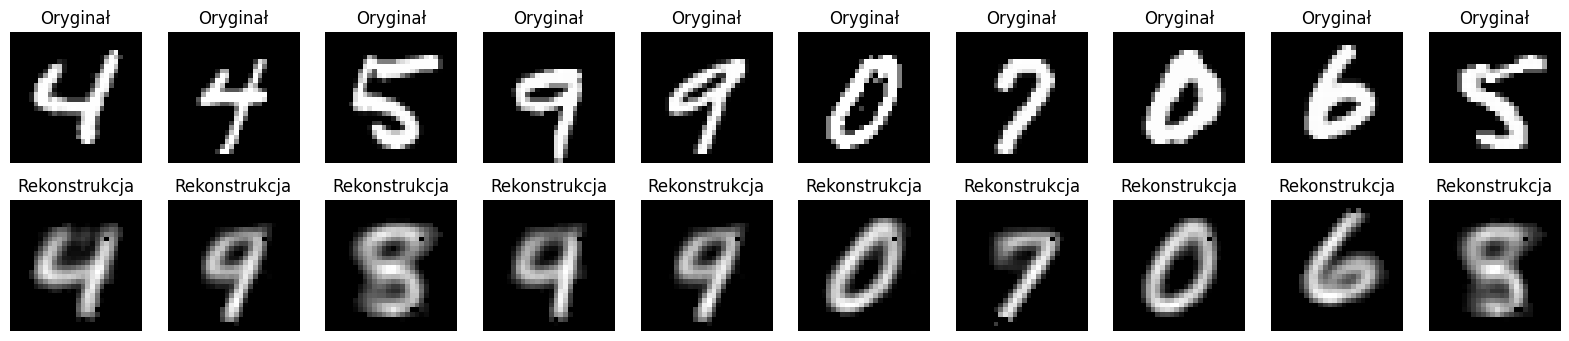

In [27]:
num_images = 10
random_indices = np.random.choice(x_test.shape[0], num_images)
sample_images = x_test[random_indices]

reconstructed_images = autoencoder.predict(sample_images)

plt.figure(figsize=(20, 4))
for i in range(num_images):
    ax = plt.subplot(2, num_images, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title("Oryginał")
    plt.axis('off')
    
    ax = plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
    plt.title("Rekonstrukcja")
    plt.axis('off')

plt.show()

### Przestrzeń latentna

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step


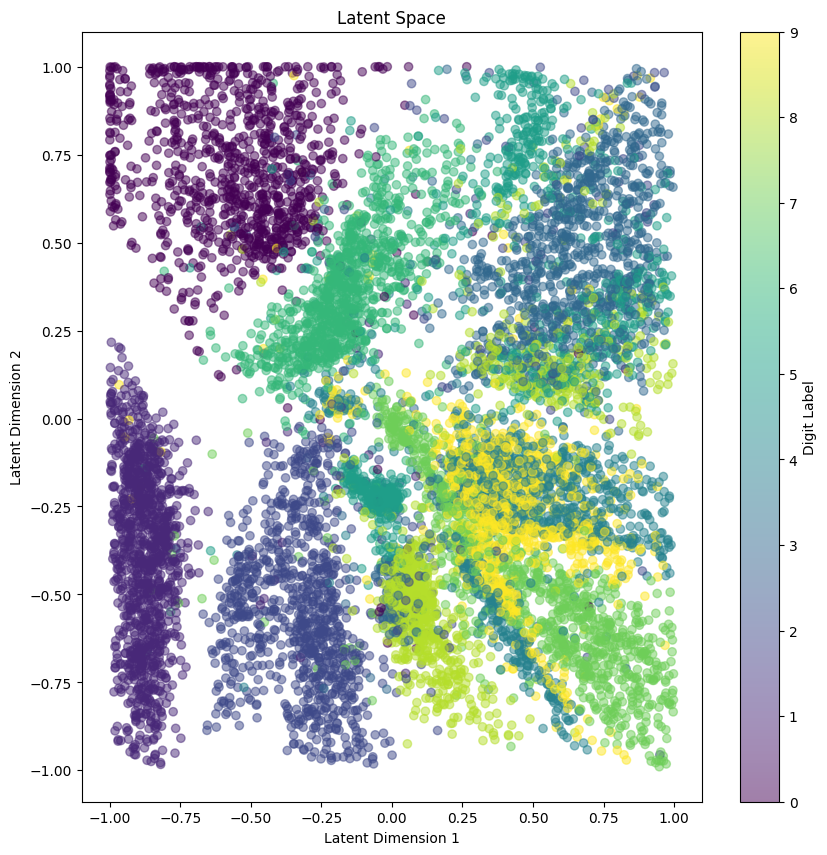

In [28]:
encoded_images = encoder.predict(x_test)

plt.figure(figsize=(10, 10))
scatter = plt.scatter(encoded_images[:, 0], encoded_images[:, 1], c=y_test, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Digit Label')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('Latent Space')
plt.show()

### Test dekodowania na macierzy wartości losowych

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


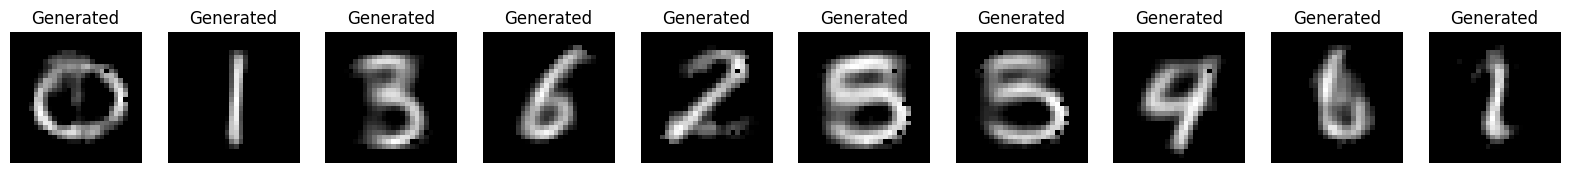

In [29]:
num_samples = 10
random_latent_vectors = np.random.uniform(-1, 1, size=(num_samples, 2))
generated_images = decoder.predict(random_latent_vectors)

plt.figure(figsize=(20, 4))
for i in range(num_samples):
    ax = plt.subplot(1, num_samples, i + 1)
    plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
    plt.title("Generated")
    plt.axis('off')

plt.show()